# Lab 4

# Day 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit 

bias = []
for i in range(1,10):
    bias.append(fits.getdata('Bias-'+ "0"*(4-len(str(i))) +str(i)+ ".fit", ext = 0).astype(np.int))
    
dark = []
for i in range(1,10):
    dark.append(fits.getdata('Dark-'+ "0"*(4-len(str(i))) +str(i)+ ".fit", ext = 0).astype(np.int))
    
flat144 = []
for i in range(1,10):
    flat144.append(fits.getdata('Flat144-' + "0"*(4-len(str(i))) +str(i)+ ".fit", ext = 0).astype(np.int))
    
flat200 = []
for i in range(1,10):
    flat200.append(fits.getdata('Flat200-' + "0"*(4-len(str(i))) +str(i)+ ".fit", ext = 0).astype(np.int))
    
flat255 = []
for i in range(1,10):
    flat255.append(fits.getdata('Flat255-' + "0"*(4-len(str(i))) +str(i)+ ".fit", ext = 0).astype(np.int))
    

In [2]:
bias = np.asarray(bias)
biasMean = bias.mean(axis=0)

In [3]:
dark = np.asarray(dark)

In [4]:
flat144 = np.asarray(flat144)
flat144bias = (flat144 - biasMean)
flat144bias.mean()
flat144var = flat144bias.var(axis=0)
flat144varMean = flat144var.mean()

In [5]:
flat200 = np.asarray(flat200)
flat200bias = (flat200 - biasMean)
flat200bias.mean()
flat200var = flat200bias.var(axis=0)
flat200varMean = flat200var.mean()

In [6]:
flat255 = np.asarray(flat255)
flat255bias = (flat255 - biasMean)
flat255bias.mean()
flat255var = flat255bias.var(axis=0)
flat255varMean = flat255var.mean()

In [7]:
def funcSlope (x,m,b):
    return m*x+b

m0,b0 = (0.5,0)
xvals = [flat144varMean,flat200varMean,flat255varMean]
yvals = [flat144bias.mean(),flat200bias.mean(),flat255bias.mean()]
coeffs, fiterr = curve_fit(funcSlope, xvals, yvals, p0=(m0,b0))

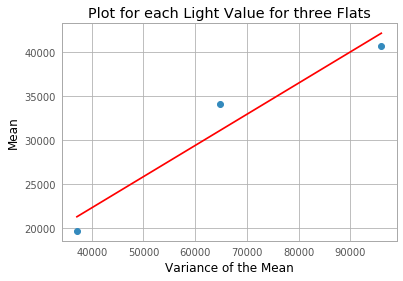

<Figure size 432x288 with 0 Axes>

Gain Value 0.3546585920770704

***This Gain Value is inaccurate due to the third data point being off
...This was caused from too short of an exposure, not enough frames, etc


In [8]:
plt.scatter([flat144varMean,flat200varMean,flat255varMean], [flat144bias.mean(),flat200bias.mean(),flat255bias.mean()])
plt.plot(xvals,funcSlope(np.array(xvals),*coeffs), color='r')

plt.title('Plot for each Light Value for three Flats')
plt.xlabel('Variance of the Mean')
plt.ylabel('Mean')

fig = plt.figure()
plt.show()


print('Gain Value', coeffs[0])
print('\n***This Gain Value is inaccurate due to the third data point being off')
print('...This was caused from too short of an exposure, not enough frames, etc')


In [9]:
readNoise = (coeffs[0]*bias.std(axis=0).mean())
print('Read Noise = ', readNoise)
print('\n***This Read Noise value is also inaccurate due to the same reasons mentioned above')

Read Noise =  6.8310331534213935

***This Read Noise value is also inaccurate due to the same reasons mentioned above


In [19]:
#i am now going to plot only the first 2 points that seem to follow the correct slope and should give a more accurate gain value

def func (x,m,b):
    return (m*x) + b

m0,b0 = (0.5,0)
xvals = [flat144varMean, flat200varMean]
yvals = [flat144bias.mean(), flat200bias.mean()]
coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(m0,b0))

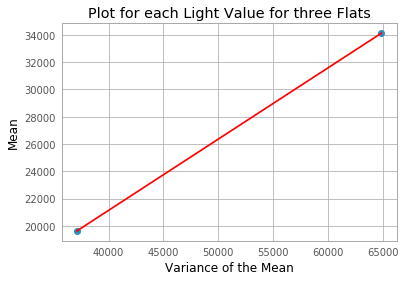

<Figure size 432x288 with 0 Axes>

Gain Value 0.5226289215486954

***This Gain Value is much closer to the expected value of 0.5 for the Angell Hall CCD :)


In [11]:
plt.scatter([flat144varMean,flat200varMean], [flat144bias.mean(),flat200bias.mean()])
plt.plot(xvals,func(np.array(xvals),*coeffs), color='r')

plt.title('Plot for each Light Value for three Flats')
plt.xlabel('Variance of the Mean')
plt.ylabel('Mean')

fig = plt.figure()
plt.show()


print('Gain Value', coeffs[0])
print('\n***This Gain Value is much closer to the expected value of 0.5 for the Angell Hall CCD :)')

In [12]:
readNoiseFirstTwo = (coeffs[0]*bias.std(axis=0).mean())
print('Read Noise for only the first two points = ', readNoiseFirstTwo)
print('\n***This Read Noise is much closer to the expected value of 10')

Read Noise for only the first two points =  10.066287888663908

***This Read Noise is much closer to the expected value of 10


# Day 2

In [13]:
bias2 = []  #this is for my own groups bias data collected on day 2
            #most variables ending with a '2' represent day 2

for i in range(1,30):
    bias2.append(fits.getdata("Bias-Day2--"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
bias2 = np.asarray(bias2)
bias2mean = bias2.mean(axis=0)

In [14]:
#Importing other groups data in ascending temperature order
groupsImage1 = fits.getdata("GroupADarkT4.6Exp450.fit")
groupsImage2 = fits.getdata("GroupBDarkT6Exp300.fit")
groupsImage3 = fits.getdata("GroupAADark_Day_2_6cexp900-0001.fit")
groupsImage4 = fits.getdata("DarkT6exp600-0001.fit")
groupsImage5 = fits.getdata("GroupDDarkT7Exp600.fit")
groupsImage6 = fits.getdata("GroupBBDarkT7Exp400.fit")
groupsImage7 = fits.getdata("GroupCDarkT7.1Exp400.fit")
groupsImage8 = fits.getdata("GroupBBDarkT8Exp400.fit")
groupsImage9 = fits.getdata("GroupADarkT8.9Exp300.fit")
groupsImage10 = fits.getdata("GroupBDarkT9Exp600.fit")
groupsImage11 = fits.getdata("GroupAADark_Day_2_9cexp300-0001.fit")
groupsImage12 = fits.getdata("DarkT9exp600-0001.fit")
groupsImage13 = fits.getdata("GroupCDarkT9.4Exp300.fit")
groupsImage14 = fits.getdata("GroupDDarkT9.4Exp300.fit")

In [15]:
darkMean1 = np.mean(groupsImage1 - bias2mean)/450
darkMean2 = np.mean(groupsImage2 - bias2mean)/300
darkMean3 = np.mean(groupsImage3 - bias2mean)/900
darkMean4 = np.mean(groupsImage4 - bias2mean)/600
darkMean5 = np.mean(groupsImage5 - bias2mean)/600
darkMean6 = np.mean(groupsImage6 - bias2mean)/400
darkMean7 = np.mean(groupsImage7 - bias2mean)/400
darkMean8 = np.mean(groupsImage8 - bias2mean)/400
darkMean9 = np.mean(groupsImage9 - bias2mean)/300
darkMean10 = np.mean(groupsImage10 - bias2mean)/600
darkMean11 = np.mean(groupsImage11 - bias2mean)/300
darkMean12 = np.mean(groupsImage12 - bias2mean)/600
darkMean13 = np.mean(groupsImage13 - bias2mean)/300
darkMean14 = np.mean(groupsImage14 - bias2mean)/300

In [16]:
def funcDarkCurrent (T,E,A):
    return A*T**(1.5)*np.exp(-E/(2*(8.6173*10**(-5))*T))

E0,A0 = (1.1, 130)
zeroKelvin = 273.150

temperaturesX = [4.6+zeroKelvin, 6+zeroKelvin, 6+zeroKelvin, 6+zeroKelvin, 7+zeroKelvin, 7+zeroKelvin, 7.1+zeroKelvin, 8+zeroKelvin, 8.9+zeroKelvin, 9+zeroKelvin, 9+zeroKelvin, 9+zeroKelvin, 9.4+zeroKelvin, 9.4+zeroKelvin]

darkCurrentsY = [darkMean1, darkMean2, darkMean3, darkMean4, darkMean5, darkMean6, darkMean7, darkMean8, darkMean9, darkMean10, darkMean11, darkMean12, darkMean13, darkMean14]

coeffs2, fiterr = curve_fit(funcDarkCurrent, temperaturesX, darkCurrentsY, p0=(E0,A0))

Text(0, 0.5, 'Dark Current (electrons/sec)')

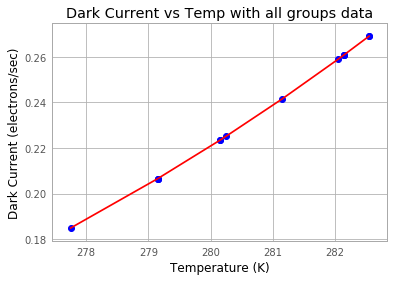

In [17]:
plt.plot(temperaturesX, funcDarkCurrent(np.array(temperaturesX),*coeffs2), color = 'r')
plt.scatter(temperaturesX, funcDarkCurrent(np.array(temperaturesX),*coeffs2), color = 'b')

plt.title('Dark Current vs Temp with all groups data')
plt.xlabel('Temperature (K)')
plt.ylabel('Dark Current (electrons/sec)')

In [18]:
coeffs2[0]
print('Band Gap Energy Calculated = E_g = ', coeffs2[0])

print('----> Theoretical Band Gap for Silicon = 1.14 which is very close to my calculation!')

coeffs2[1]
print('\nADU/Pixel/sec Calculated = ', coeffs2[1])

print('----> Theoretical ADY/Pixel/sec = 30,000 ADU\'s which is very close to my calculation!')

Band Gap Energy Calculated = E_g =  0.9841200617263713
----> Theoretical Band Gap for Silicon = 1.14 which is very close to my calculation!

ADU/Pixel/sec Calculated =  33885.43282392529
----> Theoretical ADY/Pixel/sec = 30,000 ADU's which is very close to my calculation!


# End of Lab 4 :)